In [1]:
import matplotlib.pyplot as plt
import numpy as np

$$
\frac{d}{dt}N  = \frac{1}{C_0}N^2
$$

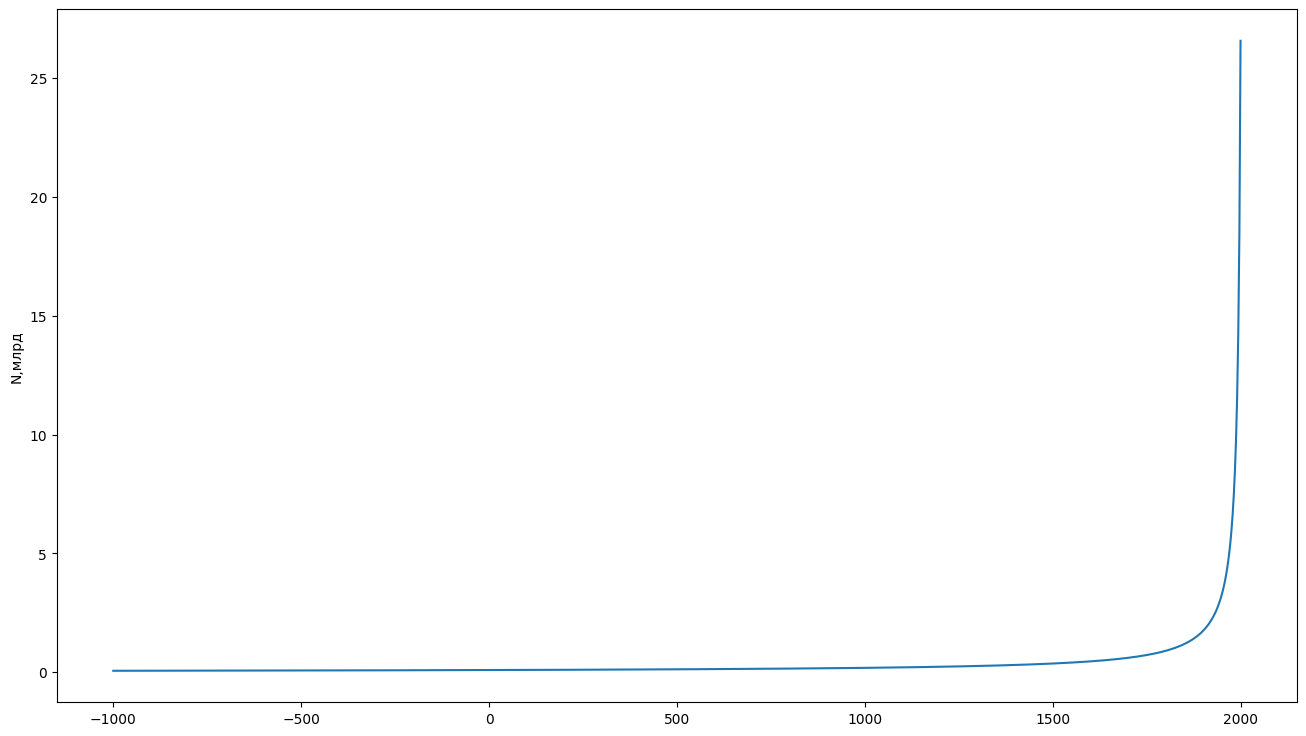

In [31]:
fig,ax = plt.subplots()
fig.set_size_inches(16,9)
C0 = 186*10**9
T0 = 2007.0
k = 1.0
t_vec = np.linspace(-1000, 2000,1000) 
y_vec = C0/(T0-t_vec)/10.0**9
ax.plot(t_vec,y_vec)
ax.set_ylabel('N,млрд')
print('')

$$
u_t = \alpha u^2 + (D_x u_x)_x + (D_y u_y)_y
$$
$$
\alpha > 0
$$
$$
D_x(u) > 0
$$
$$
D_y(u) > 0
$$

$$
D_x(u) = Cu^{\sigma},\sigma>0 
$$

$$
D_y(u) = Cu^{\sigma},\sigma>0
$$


$$
u_t = F(u) + (D_x u_x)_x + (D_y u_y)_y
$$
1. 
$$
F(u)>0,D_x(u) > 0, D_y(u) > 0
$$

2. 
$$
F(u) \in \mathbb{R},D_x(u) > 0, D_y(u) > 0
$$
